In [1]:
import time
start = time.time()

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import FastICA
from announce import *

In [2]:
early_warning_url = "data_exp_4.csv"
early_warning = pd.read_csv(early_warning_url, sep=";")
early_warning

,Unnamed: 0,frame_time,total_pacotes,total_pacotes_icmp,total_pacotes_udp,total_pacotes_tcp,maior_pacote,menor_pacote,soma_pacotes,total_ips_destino,...,10_coefficient_variation_std_tcp_time_relative,10_lag-1AC_std_tcp_time_relative,10_lag-2AC_std_tcp_time_relative,10_lag-3AC_std_tcp_time_relative,10_skw_mean_tcp_time_relative,10_kurt_mean_tcp_time_relative,10_coefficient_variation_mean_tcp_time_relative,10_lag-1AC_mean_tcp_time_relative,10_lag-2AC_mean_tcp_time_relative,10_lag-3AC_mean_tcp_time_relative
0,0,"Sep 6, 2018 06:43:20.739961000 -03",47707,8,0,47574,238,60,2872172,23690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Sep 6, 2018 06:44:20.708731000 -03",75612,12,0,75560,90,60,4537976,37770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"Sep 6, 2018 06:45:20.280279000 -03",76304,20,0,76240,90,60,4579840,38095,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"Sep 6, 2018 06:46:20.000237000 -03",75926,16,0,75874,110,60,4556972,37916,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"Sep 6, 2018 06:47:20.296910000 -03",75620,18,0,75558,90,60,4538568,37764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1435,"Sep 7, 2018 06:38:20.237529000 -03",75962,14,0,75908,182,60,4559568,37923,...,0.206065,-0.058721,-0.146032,-0.035813,0.600854,1.298590,0.313103,0.070124,-0.090375,0.000005
1436,1436,"Sep 7, 2018 06:39:20.133388000 -03",75976,10,0,75914,90,60,4560370,37922,...,0.205486,-0.060671,-0.145330,-0.035591,0.598976,1.287440,0.313226,0.074988,-0.092541,0.002603
1437,1437,"Sep 7, 2018 06:40:20.124192000 -03",76266,2,0,76208,90,60,4577586,38084,...,0.206481,-0.061090,-0.141701,-0.026111,0.601809,1.257037,0.314488,0.068177,-0.095715,0.005031
1438,1438,"Sep 7, 2018 06:41:20.251388000 -03",75962,12,0,75888,90,60,4559672,37919,...,0.206707,-0.066740,-0.143967,-0.027559,0.574491,1.178554,0.314697,0.060600,-0.090867,0.012910


In [3]:
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.text import Annotation

class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)
        
def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

# Avaliação 1

In [4]:
colunas = ['10_kurt_maior_pacote', '10_skw_total_ips_destino', '10_coefficient_variation_total_ips_origem' ]
init = 241
limit = 321
x_train = early_warning[colunas].copy()[init:limit]
y_real = early_warning['has_bot'][init:limit]
#x_train = x_train.fillna(0)
clustering = KMeans(n_clusters=2, random_state=0).fit(x_train)    
y_test = clustering.labels_
print(confusion_matrix(y_real, y_test))
print(classification_report(y_real, y_test, digits=4))

[[60  0]
 [ 0 20]]
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        60
           1     1.0000    1.0000    1.0000        20

    accuracy                         1.0000        80
   macro avg     1.0000    1.0000    1.0000        80
weighted avg     1.0000    1.0000    1.0000        80



<Figure size 640x480 with 0 Axes>

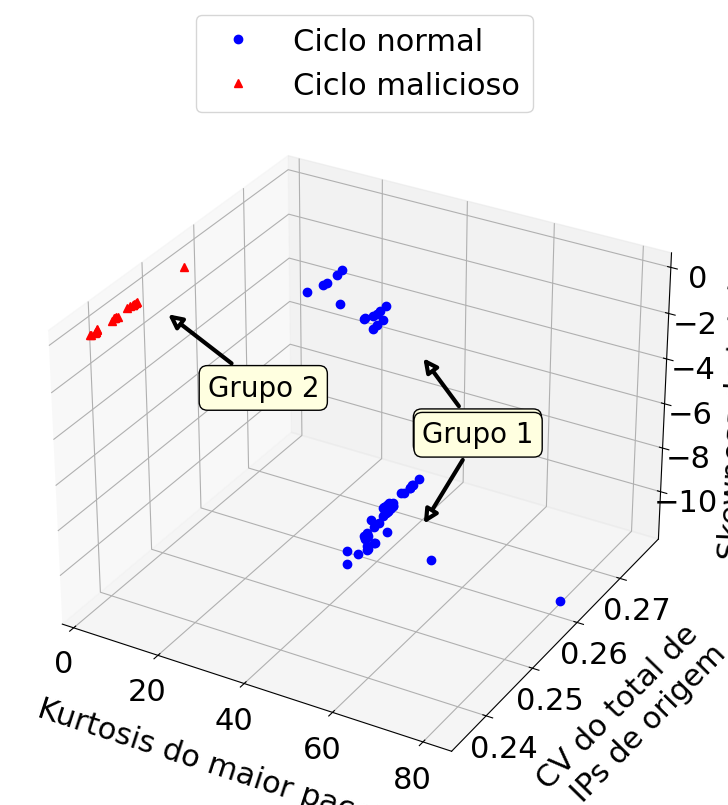

<Figure size 640x480 with 0 Axes>

In [5]:
colunas = ['10_kurt_maior_pacote', '10_skw_total_ips_destino', '10_coefficient_variation_total_ips_origem',
           'has_bot']
          
dataframe = early_warning[colunas][init:limit]
dataframe['y_test'] = y_test
df1= dataframe.query('has_bot == 0')                                
df2= dataframe.query('has_bot == 1')  

plt.clf()

fig2 = plt.figure(figsize = (9, 9))
ax2 = plt.axes(projection ="3d")
font_size = 22


ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]

font_size_group = 20
ax2.annotate3D('Grupo 1',  (36.3, 0.273, -5.4),
              xytext=(0, -60),
              fontsize = font_size_group,
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.annotate3D('Grupo 1', (40, 0.27, -12.5),
              xytext=(0, 60),
              fontsize = font_size_group,
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))


ax2.annotate3D('Grupo 2', (38, 0.222, 5.3),
              xytext=(30, -60),
              fontsize = font_size_group,
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))


ax2.set_xlabel('\n\nKurtosis do maior pacote', fontsize=font_size) 
ax2.set_ylabel('\n\n\nCV do total de \n IPs de origem', fontsize=font_size) 
ax2.set_zlabel('\n\nSkewness do total de \n IPs de destino', fontsize=font_size)

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label="Ciclo normal", c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label="Ciclo malicioso", c='red')

fig2.legend(loc="upper center",prop={'size': font_size})
plt.savefig("original.pdf")
plt.show()
plt.clf()


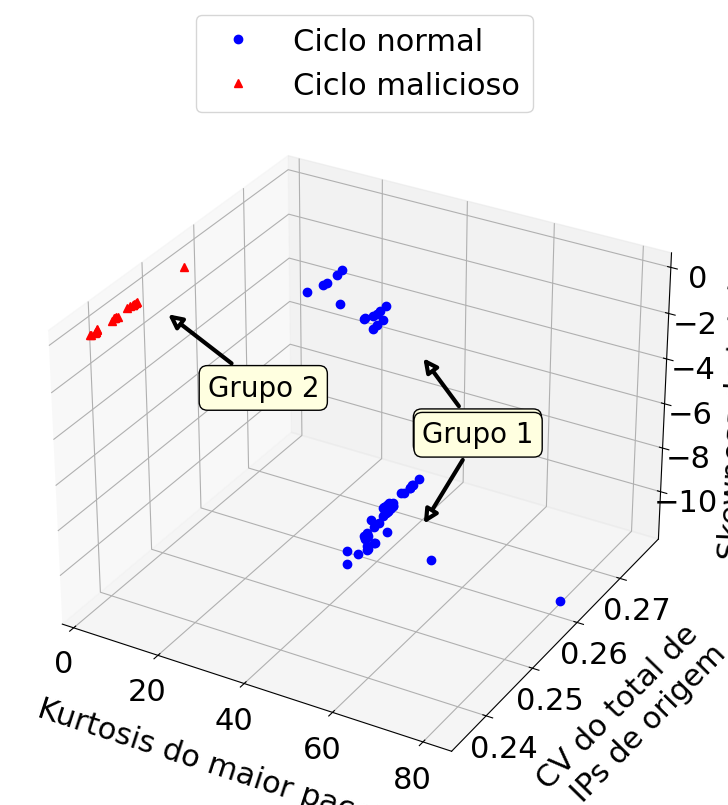

In [6]:
df1= dataframe.query('y_test == 0')                                
df2= dataframe.query('y_test == 1')  

fig2 = plt.figure(figsize = (9, 9))
ax2 = plt.axes(projection ="3d")

ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]

ax2.set_xlabel('\n\nKurtosis do maior pacote', fontsize=font_size) 
ax2.set_ylabel('\n\n\nCV do total de \n IPs de origem', fontsize=font_size) 
ax2.set_zlabel('\n\nSkewness do total de \n IPs de destino', fontsize=font_size)

font_size_group = 20
ax2.annotate3D('Grupo 1',  (36.3, 0.273, -5.4),
              xytext=(0, -60),
              fontsize = font_size_group,
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.annotate3D('Grupo 1', (40, 0.27, -12.5),
              xytext=(0, 60),
              fontsize = font_size_group,
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))


ax2.annotate3D('Grupo 2', (38, 0.222, 5.3),
              xytext=(30, -60),
              fontsize = font_size_group,
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label="Ciclo normal", c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label="Ciclo malicioso", c='red')

fig2.legend(loc="upper center",prop={'size': font_size})

plt.savefig("cluster.pdf")
plt.show()

<Figure size 640x480 with 0 Axes>

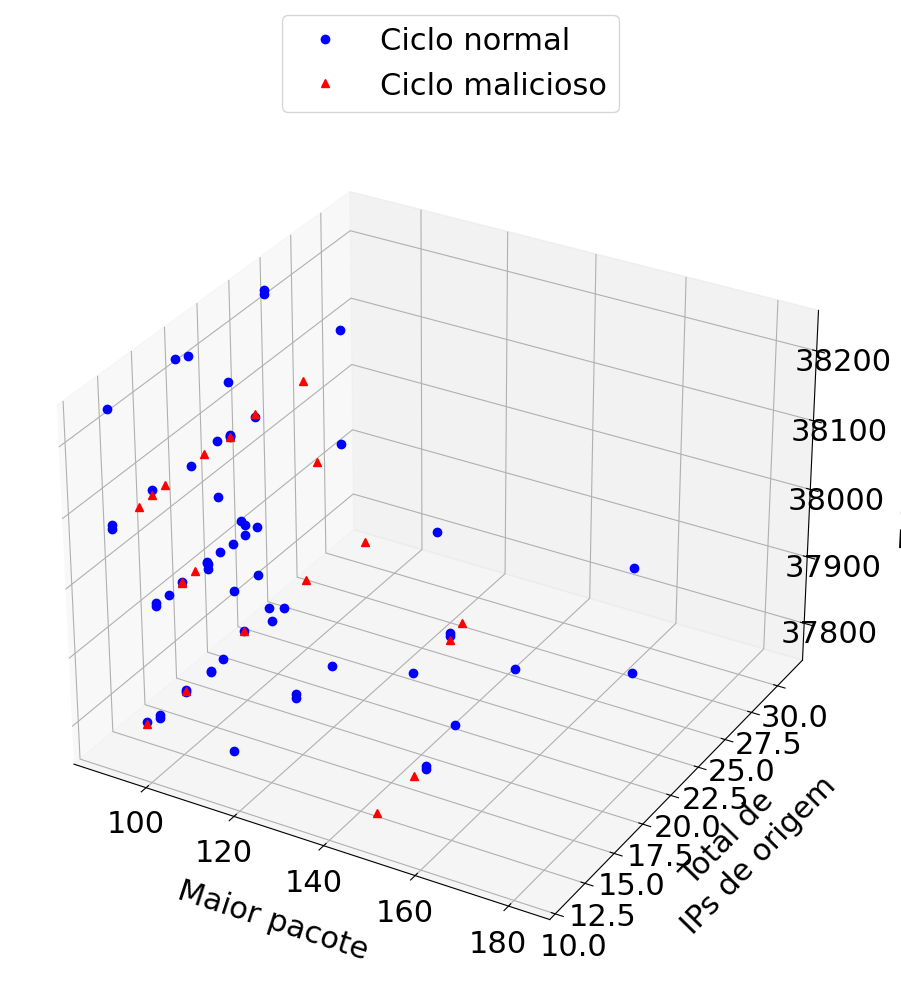

<Figure size 640x480 with 0 Axes>

In [7]:
colunas = ['maior_pacote', 'total_ips_destino', 'total_ips_origem',
           'has_bot']
          
dataframe = early_warning[colunas][init:limit]
dataframe['y_test'] = y_test
df1= dataframe.query('has_bot == 0')                                
df2= dataframe.query('has_bot == 1')  

plt.clf()

fig2 = plt.figure(figsize = (11,11))
ax2 = plt.axes(projection ="3d")
font_size = 22
ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]


ax2.set_xlabel('\n\nMaior pacote', fontsize=font_size) 
ax2.set_ylabel('\n\nTotal de \n IPs de origem', fontsize=font_size) 
ax2.set_zlabel('\n\n\n\nTotal de \n IPs de destino', fontsize=font_size)
               
font_size_group = 20

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label="Ciclo normal", c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label="Ciclo malicioso", c='red')
fig2.legend(loc="upper center",prop={'size': font_size})
plt.savefig("sem_esap.pdf")
plt.show()
plt.clf()

# Avaliação 2

In [8]:
colunas = ['10_kurt_maior_pacote', '10_skw_total_ips_destino', '10_coefficient_variation_total_ips_origem' ]
init = 241
limit = 321
x_train = early_warning[colunas].copy()[init:limit]
y_real = early_warning['has_bot'][init:limit]
resultado2 = announce(x_train)
pd.set_option('display.max_rows', resultado2.shape[0]+1)
resultado2.to_csv('resultado_teste_padrao_exp_4.csv', sep=";")
resultado2

,Algorithm,mean,Calinski_harabasz_score_minmax,Silhouette_score_minmax,CDBW_minmax,Davies_bouldin_score_minmax_normalizado,SDBW_minmax_normalizado,Calinski_harabasz_score,Silhouette_score,Davies_bouldin_score,SDBW,CDBW,Davies_bouldin_score_minmax,SDBW_minmax
0,"SOM(m=2, n=1, dim=3, random_state=0)",0.879961,0.572629,1.000000,1.000000,1.000000,0.827178,251.955450,0.803854,0.222203,0.154445,11.141319,0.000000,0.172822
1,"KMeans(n_clusters=2, random_state=0, tol=1)",0.879961,0.572629,1.000000,1.000000,1.000000,0.827178,251.955450,0.803854,0.222203,0.154445,11.141319,0.000000,0.172822
2,"KMeans(n_clusters=2, random_state=0, tol=0.1)",0.879961,0.572629,1.000000,1.000000,1.000000,0.827178,251.955450,0.803854,0.222203,0.154445,11.141319,0.000000,0.172822
3,"KMeans(n_clusters=2, random_state=0, tol=0.01)",0.879961,0.572629,1.000000,1.000000,1.000000,0.827178,251.955450,0.803854,0.222203,0.154445,11.141319,0.000000,0.172822
4,"KMeans(n_clusters=2, random_state=0, tol=0.001)",0.879961,0.572629,1.000000,1.000000,1.000000,0.827178,251.955450,0.803854,0.222203,0.154445,11.141319,0.000000,0.172822
5,"KMeans(n_clusters=2, random_state=0)",0.879961,0.572629,1.000000,1.000000,1.000000,0.827178,251.955450,0.803854,0.222203,0.154445,11.141319,0.000000,0.172822
6,"KMeans(algorithm='elkan', n_clusters=2, random...",0.879961,0.572629,1.000000,1.000000,1.000000,0.827178,251.955450,0.803854,0.222203,0.154445,11.141319,0.000000,0.172822
7,"KMeans(algorithm='elkan', n_clusters=2, random...",0.879961,0.572629,1.000000,1.000000,1.000000,0.827178,251.955450,0.803854,0.222203,0.154445,11.141319,0.000000,0.172822
8,"KMeans(algorithm='elkan', n_clusters=2, random...",0.879961,0.572629,1.000000,1.000000,1.000000,0.827178,251.955450,0.803854,0.222203,0.154445,11.141319,0.000000,0.172822
9,"KMeans(algorithm='elkan', n_clusters=2, random...",0.879961,0.572629,1.000000,1.000000,1.000000,0.827178,251.955450,0.803854,0.222203,0.154445,11.141319,0.000000,0.172822


In [9]:
print(resultado2['Algorithm'][0])
clustering = eval(resultado2['Algorithm'][0])
clustering.fit(format_data(x_train))
print(confusion_matrix(y_real, y_test))
print(classification_report(y_real, y_test, digits=4))
y_test = [0 if i == 1 else 1 for i in y_test]

SOM(m=2, n=1, dim=3, random_state=0)
[[60  0]
 [ 0 20]]
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        60
           1     1.0000    1.0000    1.0000        20

    accuracy                         1.0000        80
   macro avg     1.0000    1.0000    1.0000        80
weighted avg     1.0000    1.0000    1.0000        80



# Avaliação 3

In [10]:
cols = early_warning.columns[361:]
print(cols)
init = 241
limit = 321
x_train_novo = early_warning[cols].copy()[init:limit]
y_real_novo = early_warning['has_bot'][init:limit]
x_train_novo = x_train_novo.fillna(0)

Index(['10_skw_total_pacotes', '10_kurt_total_pacotes',
       '10_coefficient_variation_total_pacotes', '10_lag-1AC_total_pacotes',
       '10_lag-2AC_total_pacotes', '10_lag-3AC_total_pacotes',
       '10_skw_total_pacotes_icmp', '10_kurt_total_pacotes_icmp',
       '10_coefficient_variation_total_pacotes_icmp',
       '10_lag-1AC_total_pacotes_icmp',
       ...
       '10_coefficient_variation_std_tcp_time_relative',
       '10_lag-1AC_std_tcp_time_relative', '10_lag-2AC_std_tcp_time_relative',
       '10_lag-3AC_std_tcp_time_relative', '10_skw_mean_tcp_time_relative',
       '10_kurt_mean_tcp_time_relative',
       '10_coefficient_variation_mean_tcp_time_relative',
       '10_lag-1AC_mean_tcp_time_relative',
       '10_lag-2AC_mean_tcp_time_relative',
       '10_lag-3AC_mean_tcp_time_relative'],
      dtype='object', length=306)


In [11]:
pca = FastICA(n_components=6).fit(x_train_novo)
novo  = pca.transform(x_train_novo)

In [12]:
resultado3 = announce(pd.DataFrame(novo),number_clusters=2,cluster_validity_metric = 'cdbw')
pd.set_option('display.max_rows', resultado3.shape[0]+1)
resultado3.to_csv("resultado_fs_exp_4.csv", sep=";")
resultado3

,Algorithm,cdbw
0,"KMeans(n_clusters=2, random_state=0, tol=1)",0.168853
1,"KMeans(n_clusters=2, random_state=0, tol=0.1)",0.168853
2,"KMeans(n_clusters=2, random_state=0, tol=0.01)",0.168853
3,"KMeans(n_clusters=2, random_state=0, tol=0.001)",0.168853
4,"KMeans(n_clusters=2, random_state=0)",0.168853
5,"KMeans(algorithm='elkan', n_clusters=2, random...",0.168853
6,"KMeans(algorithm='elkan', n_clusters=2, random...",0.168853
7,"KMeans(algorithm='elkan', n_clusters=2, random...",0.168853
8,"KMeans(algorithm='elkan', n_clusters=2, random...",0.168853
9,"KMeans(algorithm='elkan', n_clusters=2, random...",0.168853


In [13]:
print(resultado3['Algorithm'][0]) 
clustering = eval(resultado3['Algorithm'][0]) 
y_test = clustering.fit_predict(novo)  
y_test = [0 if i == 1 else 1 for i in y_test]
print(confusion_matrix(y_real_novo, y_test)) 
print(classification_report(y_real_novo, y_test, digits=6))

KMeans(n_clusters=2, random_state=0, tol=1)
[[60  0]
 [ 0 20]]
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000        60
           1   1.000000  1.000000  1.000000        20

    accuracy                       1.000000        80
   macro avg   1.000000  1.000000  1.000000        80
weighted avg   1.000000  1.000000  1.000000        80



In [14]:
end = time.time()
print(end - start)

3.7791829109191895
